<a href="https://colab.research.google.com/github/devkyle4/Machine-Learning/blob/main/Project_S%26D_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split

In [2]:
#Mounting Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
train_ds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KTP/dataset/train_crop.csv")
test_ds = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/KTP/dataset/test_crop.xlsx")

In [4]:
len(train_ds), len(test_ds)

(88858, 1199)

In [5]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

train_ds

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [6]:
# CREATING A DUPLICATE OF THE ORIGINAL DATASET FOR PREPROCESSING
train_ds_v1 = train_ds.copy()

In [7]:
# REPLACING MISSING VALUES WITH 0 in the Number_Weeks_Used COLUMN of TRAIN DATA
train_ds_v1['Number_Weeks_Used'].fillna(0, inplace=True)

In [8]:
# GETTING INFO ABOUT THE WHOLE DATASET

def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [9]:
get_info_dataframe(train_ds)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None 

DATAFRAME MISSING INFO - 

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type               

In [10]:
get_info_dataframe(train_ds_v1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None 

DATAFRAME MISSING INFO - 

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pest

In [11]:
crop_health_dist = (train_ds_v1['Crop_Damage'].value_counts()).round(2)
crop_health_dist

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [12]:
for col in train_ds_v1:
    print(f'{col}: {train_ds_v1[col].unique()}')

ID: ['F00000001' 'F00000003' 'F00000004' ... 'F00155939' 'F00155942'
 'F00155945']
Estimated_Insects_Count: [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
Crop_Type: [1 0]
Soil_Type: [0 1]
Pesticide_Use_Category: [1 3 2]
Number_Doses_Week: [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
Number_Weeks_Used: [ 0. 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35. 32.
 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43. 50.
 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59. 64.
 13.  7.  5. 12.  6.  9. 58. 11. 65. 67.]
Number_Weeks_Quit: [ 0  1  9  4 13  3 14  6  2 12 15 10  8 11  7  5 17 18 16 20 21 19 22 24
 23 27 25 2

####**DATA VISUALIZATION**

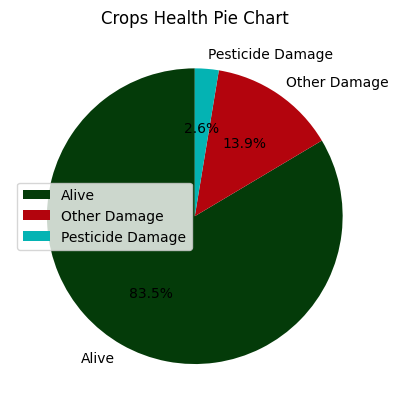

In [13]:
labels=['Alive', 'Other Damage', 'Pesticide Damage']
colors = ['#043b09','#b3040d','#04b3b3']
plt.pie(crop_health_dist,labels=labels, autopct='%1.1f%%',startangle=90, colors=colors)

plt.title('Crops Health Pie Chart')
plt.legend(labels, loc='best')

####**RELATIONSHIP BETWEEN PESTICIDE USE AND CROP HEALTH**

#### Pesticide Use Category
1 - Never\
2 - Previously Used\
3 - Currently Using


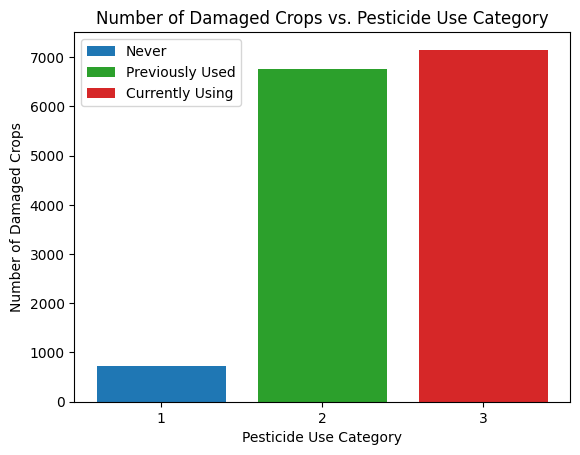

In [14]:
# A BAR CHART SHOWING A DISTRIBUTION OF NUMBER OF DAMAGED CROPS AND PESTICIDE USAGE

custom_colors = ['#1f77b4', '#2ca02c', '#d62728']
labels = ['Never', 'Previously Used','Currently Using']

damaged_crops = train_ds_v1[train_ds_v1['Crop_Damage'].isin([1,2])]  #Number of damaged crops either by pesticides or other causes

damage_counts = damaged_crops['Pesticide_Use_Category'].value_counts().sort_index() # Getting damaged crops wrt to pesticide_Use_Category

plt.bar(damage_counts.index, damage_counts.values, tick_label=damage_counts.index, color=custom_colors, label=labels)

# Label the axes and add a title
plt.xlabel('Pesticide Use Category')
plt.ylabel('Number of Damaged Crops')
plt.title('Number of Damaged Crops vs. Pesticide Use Category')
plt.legend(labels, loc='upper left')
# Show the plot
plt.show()

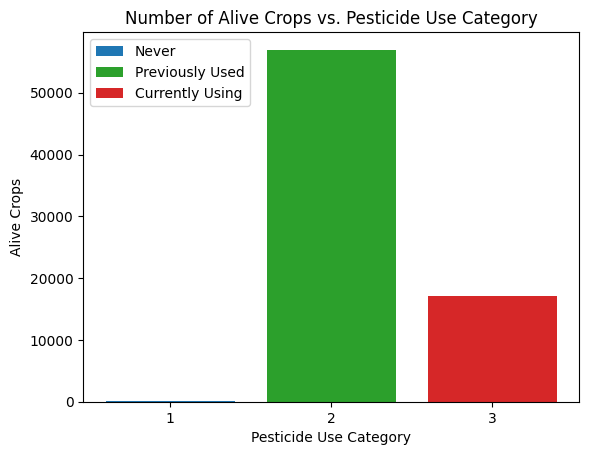

In [15]:
# A BAR CHART SHOWING A DISTRIBUTION OF NUMBER OF ALIVE CROPS AND PESTICIDE USAGE

custom_colors = ['#1f77b4', '#2ca02c', '#d62728']
labels = ['Never', 'Previously Used','Currently Using']

alive_crops = train_ds_v1[train_ds_v1['Crop_Damage'].isin([0])]  #Number of damaged crops either by pesticides or other causes

alive_counts = alive_crops['Pesticide_Use_Category'].value_counts().sort_index() # Getting damaged crops wrt to pesticide_Use_Category

plt.bar(alive_counts.index, alive_counts.values, tick_label=alive_counts.index, color=custom_colors, label=labels)

# Label the axes and add a title
plt.xlabel('Pesticide Use Category')
plt.ylabel('Alive Crops')
plt.title('Number of Alive Crops vs. Pesticide Use Category')
plt.legend(labels, loc='upper left')
# Show the plot
plt.show()

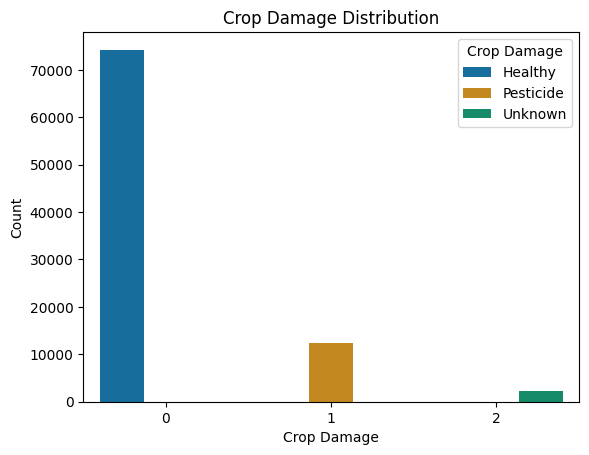

In [16]:
labels = ['Healthy', 'Pesticide', 'Unknown']
sns.countplot(x='Crop_Damage', hue='Crop_Damage', data=train_ds_v1, palette='colorblind')

plt.xlabel('Crop Damage')
plt.ylabel('Count')
plt.title('Crop Damage Distribution')
plt.legend(title='Crop Damage', labels=labels)
plt.show()

#### RELATIONSHIP BETWEEN CROP DAMAGE AND SEASON

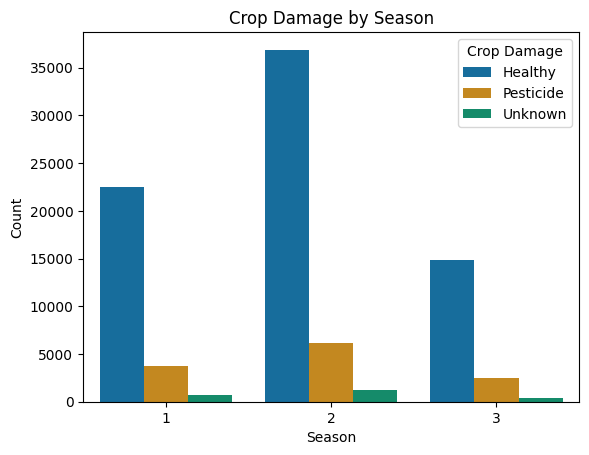

In [17]:
labels = ['Healthy', 'Pesticide', 'Unknown']
sns.countplot(x='Season', hue='Crop_Damage', data=train_ds_v1, palette='colorblind')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Crop Damage by Season')
plt.legend(title='Crop Damage', labels=labels)
plt.show()

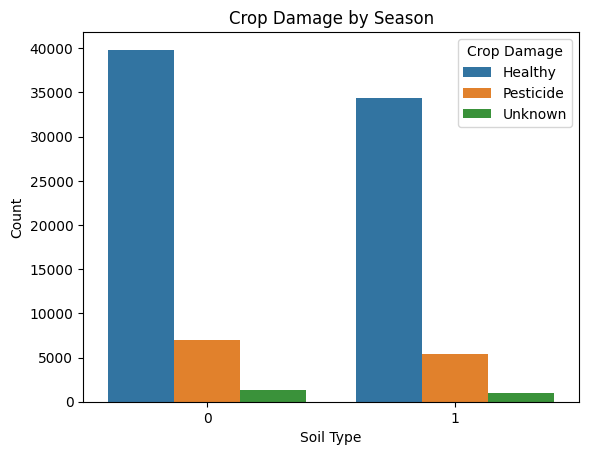

In [18]:
sns.countplot(x='Soil_Type', hue='Crop_Damage', data=train_ds_v1, palette='tab10')

plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.title('Crop Damage by Season')
plt.legend(title='Crop Damage', labels=labels)
plt.show()

<Axes: >

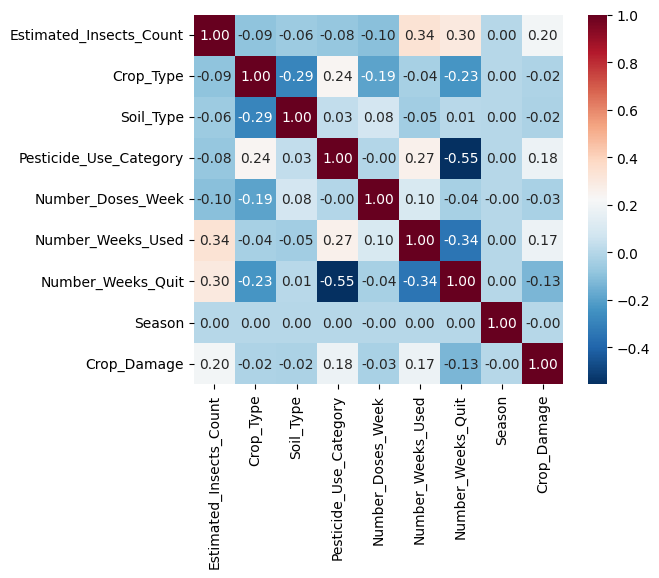

In [19]:
corr_matrix = train_ds_v1.corr(numeric_only=True)
sns.heatmap(corr_matrix,fmt=',.2f', annot=True, square=True, cmap='RdBu_r')

### DATA PREPROCESSING

In [20]:
# CHECKING FOR NAN VALUES IN THE DATASET
nan_count = train_ds_v1.isna().sum()
nan_count

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [21]:
#DUPLICATING DATAFRAME FOR EVALUATING MODEL WITHOUT SCALING
train_ds_v2 = train_ds_v1.copy()

In [22]:
# FEATURE SCALING COLUMNS: Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
scaler = MinMaxScaler()
train_ds_v1[cols_to_scale] = scaler.fit_transform(train_ds_v1[cols_to_scale])

In [23]:
for col in train_ds_v1:
    print(f'{col}: {train_ds_v1[col].unique()}')

ID: ['F00000001' 'F00000003' 'F00000004' ... 'F00155939' 'F00155942'
 'F00155945']
Estimated_Insects_Count: [9.62756524e-03 1.49480618e-02 2.71091969e-02 4.86445402e-02
 7.55003800e-02 1.08183430e-01 1.47200405e-01 2.48796554e-01
 2.69065113e-01 3.61033696e-01 4.14238662e-01 5.03673676e-01
 5.70306562e-01 7.21814036e-01 8.52799595e-01 9.48821890e-01
 9.99746643e-01 0.00000000e+00 2.53356980e-04 4.56042564e-03
 2.07752724e-02 2.05219154e-02 2.68558399e-02 3.36964783e-02
 4.10438308e-02 4.07904738e-02 5.70053205e-02 6.61261718e-02
 6.58728148e-02 8.56346592e-02 8.58880162e-02 9.65290094e-02
 1.20597922e-01 1.20344565e-01 1.33519128e-01 1.47453762e-01
 1.61895110e-01 1.62148467e-01 1.77603243e-01 1.77349886e-01
 1.93818090e-01 1.94071447e-01 2.11299721e-01 2.29541424e-01
 2.90347099e-01 2.90600456e-01 3.12895870e-01 3.36458069e-01
 3.61287053e-01 3.87129465e-01 4.14492019e-01 4.42868001e-01
 4.72510768e-01 4.72764125e-01 5.03927033e-01 5.36356727e-01
 5.70559919e-01 6.06029896e-01 6.05776

In [24]:
X_scaled = train_ds_v1.drop(['Crop_Damage','ID'], axis=1)
Y_scaled = train_ds_v1['Crop_Damage']

#TRAINING MODEL

####USING STRATIFIED CROSS VALIDATION/STRATIFIED K FOLD FOR MODEL EVALUATION

In [25]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [26]:
def stratified_kf(model, X, Y, fold_no=1):
  for train_idx, val_idx in skf.split(X, Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[val_idx]
    train_model(X_train, y_train,X_test,y_test, fold_no, model)
    fold_no += 1

In [32]:
def mse_loss(actual, predicted):
    squared_errors = [(actual - predicted)]
    mse = np.mean(squared_errors)
    return mse

best_accuracy = 0

def train_model(x_train, y_train, x_test, y_test, fold_no, model):
   global best_accuracy, best_fold, best_cm

   if isinstance(model, XGBClassifier):
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
        predictions = model.predict(x_test)
   else:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)


   accuracy = accuracy_score(y_test, predictions)
   print('Fold',str(fold_no),'Accuracy:',accuracy, 'Loss:',mse_loss(y_test, predictions))
   print(classification_report(y_test,predictions))
   cm = confusion_matrix(y_test, predictions)

   if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold = fold_no
        best_cm = cm

   print('-' * 60)

###DEALING WITH CLASS IMBALANCE IN THE DATASET

####WITH FEATURE SCALING

In [33]:
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_scaled_resampled, y_scaled_resampled = smote.fit_resample(X_scaled, Y_scaled)

In [34]:
y_scaled_resampled.value_counts()

0    74238
1    74238
2    74238
Name: Crop_Damage, dtype: int64

###CONSIDERING RANDOM FOREST CLASSIFIER

In [35]:
rf_model = RandomForestClassifier()

In [36]:
stratified_kf(rf_model,X_scaled_resampled, y_scaled_resampled)

Fold 1 Accuracy: 0.8705071503940013 Loss: -0.0013694632153200279
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14848
           1       0.84      0.81      0.83     14848
           2       0.90      0.91      0.90     14847

    accuracy                           0.87     44543
   macro avg       0.87      0.87      0.87     44543
weighted avg       0.87      0.87      0.87     44543

------------------------------------------------------------
Fold 2 Accuracy: 0.8753563971892329 Loss: 0.002491974047549559
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14848
           1       0.85      0.82      0.83     14847
           2       0.90      0.92      0.91     14848

    accuracy                           0.88     44543
   macro avg       0.87      0.88      0.88     44543
weighted avg       0.87      0.88      0.88     44543

-------------------------------------------------

Confusion Matrix with Highest Accuracy (Fold 2):


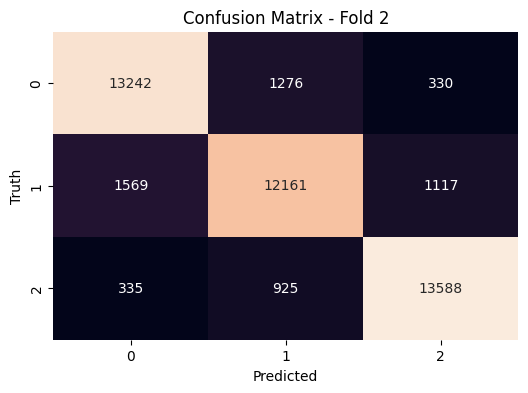

In [37]:
print('Confusion Matrix with Highest Accuracy (Fold {}):'.format(best_fold))
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Fold ' + str(best_fold))
plt.show()
best_accuracy = 0
best_fold = 0
best_cm = 0

###CONSIDERING K-NEAREST NEIGHBOR CLASSIFIER

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
stratified_kf(knn,X_scaled_resampled, y_scaled_resampled)

Fold 1 Accuracy: 0.8047504658419954 Loss: -0.11090407022427766
              precision    recall  f1-score   support

           0       0.88      0.66      0.76     14848
           1       0.73      0.84      0.78     14848
           2       0.83      0.91      0.87     14847

    accuracy                           0.80     44543
   macro avg       0.81      0.80      0.80     44543
weighted avg       0.81      0.80      0.80     44543

------------------------------------------------------------
Fold 2 Accuracy: 0.8065015827402734 Loss: -0.1112857239072357
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     14848
           1       0.73      0.85      0.78     14847
           2       0.84      0.91      0.87     14848

    accuracy                           0.81     44543
   macro avg       0.82      0.81      0.80     44543
weighted avg       0.82      0.81      0.80     44543

----------------------------------------------------

Confusion Matrix with Highest Accuracy (Fold 3):


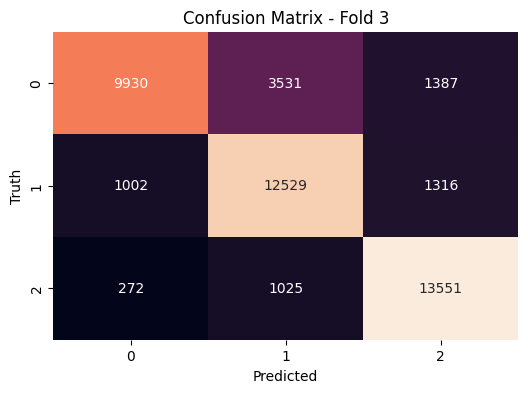

In [40]:
print('Confusion Matrix with Highest Accuracy (Fold {}):'.format(best_fold))
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Fold ' + str(best_fold))
plt.show()
best_accuracy = 0
best_fold = 0
best_cm = 0

####WITHOUT FEATURE SCALING

In [41]:
X = train_ds_v2.drop(['Crop_Damage','ID'], axis=1)
Y = train_ds_v2['Crop_Damage']

In [42]:
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [43]:
stratified_kf(rf_model,X_resampled, y_resampled)

Fold 1 Accuracy: 0.8401544574905148 Loss: -0.0126843724041937
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     14848
           1       0.80      0.79      0.79     14848
           2       0.88      0.90      0.89     14847

    accuracy                           0.84     44543
   macro avg       0.84      0.84      0.84     44543
weighted avg       0.84      0.84      0.84     44543

------------------------------------------------------------
Fold 2 Accuracy: 0.8414341198392564 Loss: -0.01232516893788025
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     14848
           1       0.80      0.79      0.80     14847
           2       0.88      0.90      0.89     14848

    accuracy                           0.84     44543
   macro avg       0.84      0.84      0.84     44543
weighted avg       0.84      0.84      0.84     44543

----------------------------------------------------

In [44]:
stratified_kf(knn, X_resampled, y_resampled)

Fold 1 Accuracy: 0.7743528725052197 Loss: -0.06187279707249175
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     14848
           1       0.69      0.82      0.75     14848
           2       0.83      0.83      0.83     14847

    accuracy                           0.77     44543
   macro avg       0.78      0.77      0.77     44543
weighted avg       0.78      0.77      0.77     44543

------------------------------------------------------------
Fold 2 Accuracy: 0.7775183530521069 Loss: -0.0660485373683856
              precision    recall  f1-score   support

           0       0.84      0.67      0.75     14848
           1       0.69      0.82      0.75     14847
           2       0.84      0.84      0.84     14848

    accuracy                           0.78     44543
   macro avg       0.79      0.78      0.78     44543
weighted avg       0.79      0.78      0.78     44543

----------------------------------------------------

Using Random Forest Without Sampling

In [45]:
stratified_kf(rf_model,X_scaled,Y_scaled)

Fold 1 Accuracy: 0.824442943956786 Loss: 0.09706279540850776
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14848
           1       0.39      0.20      0.27      2461
           2       0.11      0.05      0.06       463

    accuracy                           0.82     17772
   macro avg       0.45      0.40      0.41     17772
weighted avg       0.78      0.82      0.80     17772

------------------------------------------------------------
Fold 2 Accuracy: 0.8258496511366195 Loss: 0.09869457573711456
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14848
           1       0.39      0.20      0.27      2461
           2       0.15      0.06      0.08       463

    accuracy                           0.83     17772
   macro avg       0.47      0.40      0.42     17772
weighted avg       0.78      0.83      0.80     17772

------------------------------------------------------

Neural Network

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=42,stratify=y_resampled)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# def ANN(x_train, y_train, x_test, y_test, b_size, weights):
#   model = keras.Sequential([
#     keras.layers.Dense(32, input_dim=X_train.shape[1],activation='relu'),
#     # keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(16, activation='relu'),
#     # keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
#   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#   if weights == -1:
#     model.fit(x_train, y_train, epochs=50, batch_size=b_size)
#   else:
#     model.fit(x_train, y_train, epochs=50, batch_size=b_size, class_weight=weights)


#   model.summary()
#   loss, accuracy = model.evaluate(x_test, y_test)
#   y_preds = model.predict(x_test)

#   print("Classification Report: \n", classification_report(y_test, y_preds))
#   print("Test Loss:", loss)
#   print("Test Accuracy:", accuracy)


#   return y_preds

In [ ]:
# model1 = ANN(X_train, y_train, X_test, y_test, 32,-1)

In [ ]:
# # Save predictions to a CSV file, for example

# gauss_predictions_df = pd.DataFrame({'Crop_Damage': y_pred_gauss})
# gauss_predictions_df.to_csv('gauss_predictions.csv', index=False)